In [49]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
x_train_converted = x_train.reshape(len(x_train), 28*28) / 255
x_test_converted = x_test.reshape(len(x_test), 28*28) / 255

In [43]:
model = keras.Sequential([
  keras.layers.Dense(100, input_shape=(784,), activation="relu"),
  keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train_converted, y_train, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1212 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

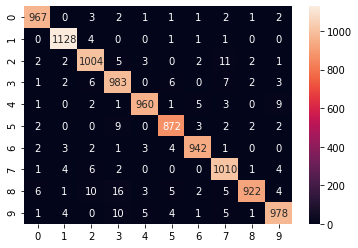

In [44]:
prediction = model.predict(x_test_converted) 
formated_predictions = [np.argmax(i) for i in prediction]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=formated_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

In [45]:
model.evaluate(x_test_converted, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0839 - accuracy: 0.9766


[0.08393247425556183, 0.9765999913215637]

In [50]:
tfjs.converters.save_keras_model(model, "model")